In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout



In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Sanvidha\Downloads\archive (3)\GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
# Drop any missing values
data = data.dropna()

In [6]:
# Select only the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

In [7]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [8]:
# Define the sequence length (number of time steps)
sequence_length = 60

# Function to create sequences of data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences of data
X, y = create_sequences(prices_scaled, sequence_length)



In [9]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [10]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Sanvidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0037
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 3.0521e-04
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 2.5282e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 2.3630e-04
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 2.3702e-04
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 2.5035e-04
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 2.0450e-04
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 1.6885e-04
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 1.5473e-04
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 1.9317e-04


In [13]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011    
Test Loss: 0.003980592824518681


In [14]:
# Make predictions
predictions = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [15]:
# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

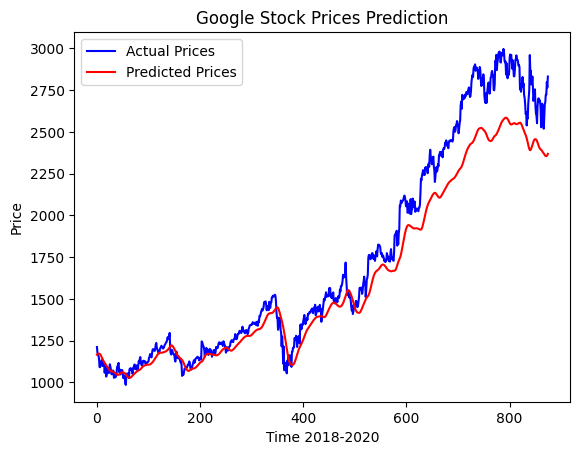

In [16]:
# Plot the predictions and actual values
plt.plot(actual, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Google Stock Prices Prediction')
plt.xlabel('Time 2018-2020')
plt.ylabel('Price')
plt.legend()
plt.show()